<a href="https://colab.research.google.com/github/misrapk/Data-Analysis-Projects/blob/main/02_World_Population_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Population analysis using the dataset from 1970 - 2022

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline as py

# !pip install pycountry
import pycountry
import warnings
warnings.filterwarnings('ignore')

In [140]:
# import dataset
data = pd.read_csv('/content/world_population.csv')
data.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [141]:
data.shape

(234, 17)

In [142]:
#more infor
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [143]:
#mathematical analysis
data.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [144]:
#correlation
# Select only numeric columns for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()
correlation_matrix

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.000000,-0.358361,-0.355854,-0.351222,-0.347461,-0.341057,-0.336152,-0.335246,-0.335379,-0.383774,0.129436,-0.224561,-0.358464
2022 Population,-0.358361,1.000000,0.999946,0.999490,0.998629,0.994605,0.987228,0.980285,0.973162,0.453411,-0.027618,-0.020863,0.999999
2020 Population,-0.355854,0.999946,1.000000,0.999763,0.999105,0.995583,0.988724,0.982121,0.975254,0.454993,-0.027358,-0.025116,0.999944
2015 Population,-0.351222,0.999490,0.999763,1.000000,0.999783,0.997340,0.991594,0.985724,0.979414,0.458240,-0.026857,-0.032154,0.999487
2010 Population,-0.347461,0.998629,0.999105,0.999783,1.000000,0.998593,0.993929,0.988786,0.983042,0.461936,-0.026505,-0.037983,0.998626
2000 Population,-0.341057,0.994605,0.995583,0.997340,0.998593,1.000000,0.998336,0.995160,0.990956,0.473933,-0.026139,-0.050515,0.994598
1990 Population,-0.336152,0.987228,0.988724,0.991594,0.993929,0.998336,1.000000,0.999042,0.996602,0.486764,-0.026224,-0.062397,0.987218
1980 Population,-0.335246,0.980285,0.982121,0.985724,0.988786,0.995160,0.999042,1.000000,0.999194,0.498166,-0.026587,-0.072349,0.980273
1970 Population,-0.335379,0.973162,0.975254,0.979414,0.983042,0.990956,0.996602,0.999194,1.000000,0.509940,-0.026881,-0.081313,0.973150
Area (km²),-0.383774,0.453411,0.454993,0.458240,0.461936,0.473933,0.486764,0.498166,0.509940,1.000000,-0.063128,-0.013970,0.453284


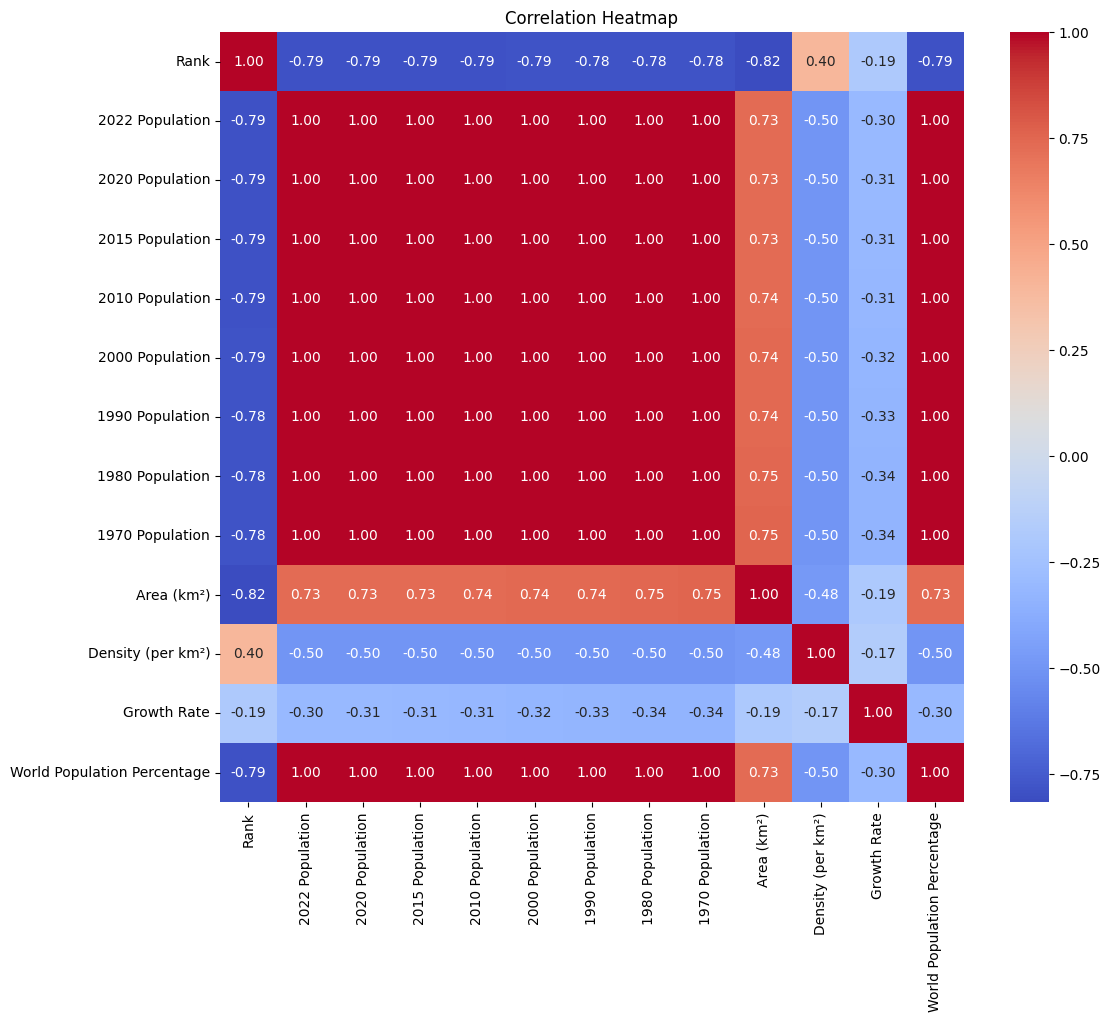

In [145]:

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [146]:
#check missing values
data.isnull().sum()

,0
Rank,0
CCA3,0
Country/Territory,0
Capital,0
Continent,0
2022 Population,0
2020 Population,0
2015 Population,0
2010 Population,0
2000 Population,0


## Data Preprocesing

In [147]:
data.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [148]:
df = data #coping the data

In [149]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [150]:
df.rename(columns={'Country/Territory' : 'Country'}, inplace=True)

In [151]:
df.head(0)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage


In [152]:
'2022 Population'.split(' ')[0]

'2022'

In [153]:
#change Year_population to Year
for col in df.columns:
  if 'Population' and '0' in col:
      df = df.rename(columns={col: col.split(' ')[0]})

df.head(5)

,Rank,CCA3,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [154]:
#check for null objects
df.isnull().sum()

,0
Rank,0
CCA3,0
Country,0
Capital,0
Continent,0
2022,0
2020,0
2015,0
2010,0
2000,0


In [155]:
df.duplicated().sum()

np.int64(0)

In [156]:
df.nunique()

,0
Rank,234
CCA3,234
Country,234
Capital,234
Continent,6
2022,234
2020,234
2015,234
2010,234
2000,234


### Observation
1. No null values (data is cleaned)
2. NO Duplicate values.
3. 234 unique countris

In [157]:
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022', '2020',
       '2015', '2010', '2000', '1990', '1980', '1970', 'Area (km²)',
       'Density (per km²)', 'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [158]:
df.describe().T.sort_values(ascending=0, by='mean')

,count,mean,std,min,25%,50%,75%,max
2022,234.0,3.407441e+07,1.367664e+08,510.0000,419738.500000,5.559944e+06,2.247650e+07,1.425887e+09
2020,234.0,3.350107e+07,1.355899e+08,520.0000,415284.500000,5.493074e+06,2.144798e+07,1.424930e+09
2015,234.0,3.172996e+07,1.304050e+08,564.0000,404676.000000,5.307400e+06,1.973085e+07,1.393715e+09
2010,234.0,2.984524e+07,1.242185e+08,596.0000,393149.000000,4.942770e+06,1.915957e+07,1.348191e+09
2000,234.0,2.626947e+07,1.116982e+08,651.0000,327242.000000,4.292907e+06,1.576230e+07,1.264099e+09
1990,234.0,2.271022e+07,9.783217e+07,700.0000,264115.750000,3.825410e+06,1.186923e+07,1.153704e+09
1980,234.0,1.898462e+07,8.178519e+07,733.0000,229614.250000,3.141146e+06,9.826054e+06,9.823725e+08
1970,234.0,1.578691e+07,6.779509e+07,752.0000,155997.000000,2.604830e+06,8.817329e+06,8.225344e+08
Area (km²),234.0,5.814494e+05,1.761841e+06,1.0000,2650.000000,8.119950e+04,4.304258e+05,1.709824e+07
Density (per km²),234.0,4.521270e+02,2.066122e+03,0.0261,38.417875,9.534675e+01,2.389332e+02,2.317227e+04


In [159]:
continent_df = df.groupby(by='Continent').sum()
continent_df

,Rank,CCA3,Country,Capital,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,,,,
Africa,5253,DZAAGOBENBWABFABDICMRCPVCAFTCDCOMDJICODEGYGNQE...,AlgeriaAngolaBeninBotswanaBurkina FasoBurundiC...,AlgiersLuandaPorto-NovoGaboroneOuagadougouBuju...,1426730932,1360671810,1201102442,1055228072,818946032,638150629,481536377,365444348,30317963,7127.7158,58.2109,17.87
Asia,3878,AFGARMAZEBHRBGDBTNBRNKHMCHNGEOHKGINDIDNIRNIRQI...,AfghanistanArmeniaAzerbaijanBahrainBangladeshB...,KabulYerevanBakuManamaDhakaThimphuBandar Seri ...,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577,2635334228,2144906290,32138141,51251.2068,50.4692,59.19
Europe,6225,ALBANDAUTBLRBELBIHBGRHRVCYPCZEDNKESTFROFINFRAD...,AlbaniaAndorraAustriaBelarusBelgiumBosnia and ...,TiranaAndorra la VellaViennaMinskBrusselsSaraj...,743147538,745792196,741535608,735613934,726093423,720320797,692527159,655923991,23010411,33166.2371,50.1128,9.33
North America,6437,AIAATGABWBHSBRBBLZBMUVGBCANCYMCRICUBCUWDMADOMS...,AnguillaAntigua and BarbudaArubaBahamasBarbado...,The ValleySaint John’sOranjestadNassauBridgeto...,600296136,594236593,570383850,542720651,486069584,421266425,368293361,315434606,24244178,10910.4703,40.1670,7.51
Oceania,4336,ASMAUSCOKFJIPYFGUMKIRMHLFSMNRUNCLNZLNIUNFKPLWP...,American SamoaAustraliaCook IslandsFijiFrench ...,Pago PagoCanberraAvaruaSuvaPapeeteHagåtñaTaraw...,45038554,43933426,40403283,37102764,31222778,26743822,22920240,19480270,8515081,3048.4905,23.1698,0.55
South America,1366,ARGBOLBRACHLCOLECUFLKGUFGUYPRYPERSURURYVEN,ArgentinaBoliviaBrazilChileColombiaEcuadorFalk...,Buenos AiresSucreBrasiliaSantiagoBogotaQuitoSt...,436816608,431530043,413134396,393078250,349634282,297146415,241789006,192947156,17833382,293.6077,14.1114,5.48


#Exploratory Data Analysis

#### For latest population Year 2022

In [160]:
print("Population in 2022 : ", df['2022'].sum())

Population in 2022 :  7973413042


In [161]:
population_by_year = df.iloc[:, 5:13].sum()[::-1]
population_by_year

,0
1970,3694136661
1980,4442400371
1990,5314191665
2000,6147055703
2010,6983784998
2015,7424809761
2020,7839250603
2022,7973413042


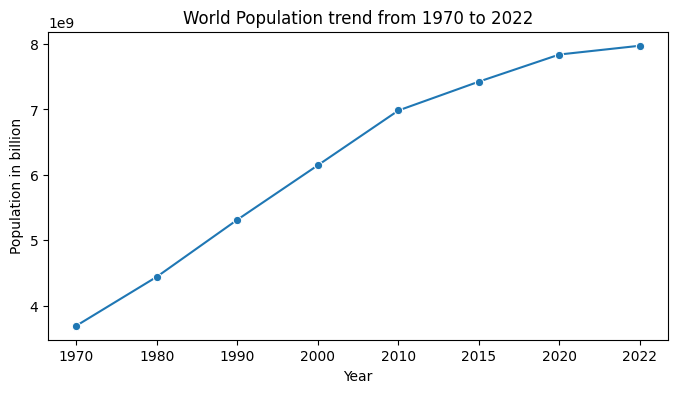

In [162]:
# trend for population since 1970
plt.subplots(figsize=(8,4))
sns.lineplot(x=population_by_year.index, y=population_by_year.values, marker='o')
plt.ylabel("Population in billion")
plt.xlabel('Year')
plt.title("World Population trend from 1970 to 2022")
plt.show()

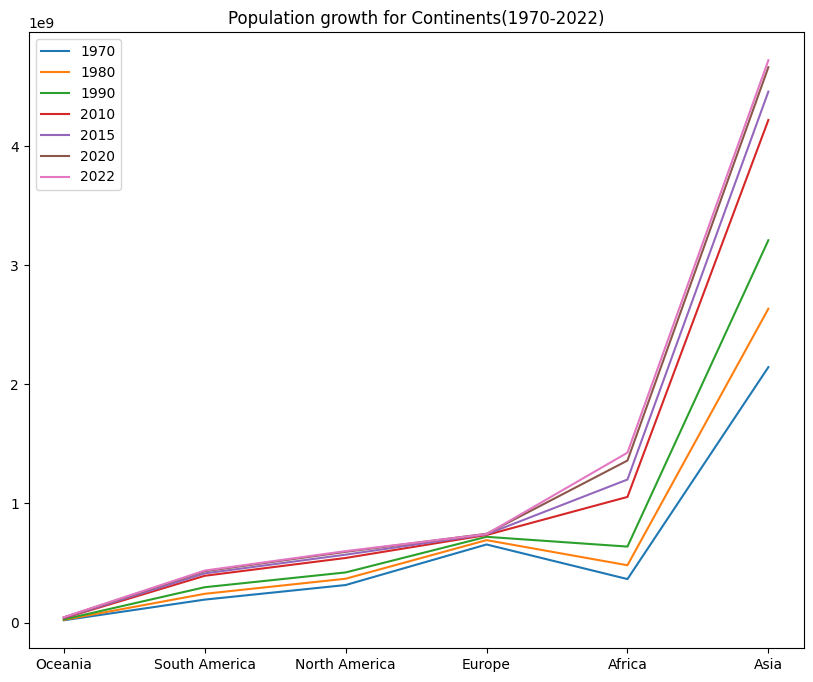

In [163]:
continent_df.sort_values(by='2022', inplace=True)
plt.figure(figsize=(10,8))
population_features = ['2022', '2020','2015','2010','1990','1980','1970']
population_features.reverse()
for feature in population_features:
  plt.plot(continent_df[feature], label=feature)
plt.title('Population growth for Continents(1970-2022)')
plt.legend()
plt.show()

#### Visualise on Map

In [164]:
# !pip install pycountry
import pycountry
countries ={}

for country in pycountry.countries:
  countries[country.name] = country.alpha_3

In [165]:
# countries

df_2022 = df.loc[:, ['CCA3', 'Country', '2022']]
df_2022['CCA3'] = [countries.get(x, 'Unknown Code') for x in df_2022['Country']]


fig = px.choropleth(df_2022, locations = 'CCA3',
                    hover_name='Country',
                    hover_data=df_2022.columns,
                    color='2022',

                    color_continuous_scale='Viridis',
                    range_color=(min(df_2022['2022']), max(df_2022['2022'])),
                    projection='natural earth',
                    title='2022 population')

fig.update_layout(margin={'r':5, 't':0, 'l':5, 'b': 0})
fig.show()

In [166]:
years = ['2022', '2020','2015','2010','1990','1980','1970']

for year in years:

  fig = px.choropleth(df,
                      locations = 'Country',
                      locationmode='country names',
                      hover_name='Country',
                      color=year,
                      projection='natural earth',
                      title=year+' population')
  fig.show()

In [167]:
fig = px.choropleth(df,
                      locations = 'Country',
                      locationmode='country names',
                      hover_name='Country',
                      color='World Population Percentage',
                      projection='natural earth',
                      color_continuous_scale='Rainbow',
                      title='World Population Percentage')
fig.show()

### Analyse Growth Rate

In [168]:
# growth Rate
fig = px.choropleth(df,
                      locations = 'Country',
                      locationmode='country names',
                      hover_name='Country',
                      color='Growth Rate',
                      projection='natural earth',
                      color_continuous_scale='Rainbow',
                      title='Growth Rate')
fig.show()

In [169]:
#average growth rate
df['Growth Rate'].mean()

np.float64(1.0095773504273504)

In [170]:
#top 10 countries with highest growth rate
top10_gr = df.sort_values(by='Country').sort_values(by='Growth Rate', ascending=False).head(10)
top10_gr

,Rank,CCA3,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
133,135,MDA,Moldova,Chisinau,Europe,3272996,3084847,3277388,3678186,4251573,4480199,4103240,3711140,33846,96.7026,1.0691,0.04
164,37,POL,Poland,Warsaw,Europe,39857145,38428366,38553146,38597353,38504431,38064255,35521429,32482943,312679,127.4698,1.0404,0.50
148,54,NER,Niger,Niamey,Africa,26207977,24333639,20128124,16647543,11622665,8370647,6173177,4669708,1267000,20.6851,1.0378,0.33
202,60,SYR,Syria,Damascus,Asia,22125249,20772595,19205178,22337563,16307654,12408996,8898954,6319199,185180,119.4797,1.0376,0.28
189,116,SVK,Slovakia,Bratislava,Europe,5643453,5456681,5424444,5396424,5376690,5261305,4973883,4522867,49037,115.0856,1.0359,0.07
55,15,COD,DR Congo,Kinshasa,Africa,99010212,92853164,78656904,66391257,48616317,35987541,26708686,20151733,2344858,42.2244,1.0325,1.24
130,182,MYT,Mayotte,Mamoudzou,Africa,326101,305587,249545,211786,159215,92659,52233,35383,374,871.9278,1.0319,0.00
39,69,TCD,Chad,N'Djamena,Africa,17723315,16644701,14140274,11894727,8259137,5827069,4408230,3667394,1284000,13.8032,1.0316,0.22
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
124,59,MLI,Mali,Bamako,Africa,22593590,21224040,18112907,15529181,11239101,8945026,7372581,6153587,1240192,18.2178,1.0314,0.28


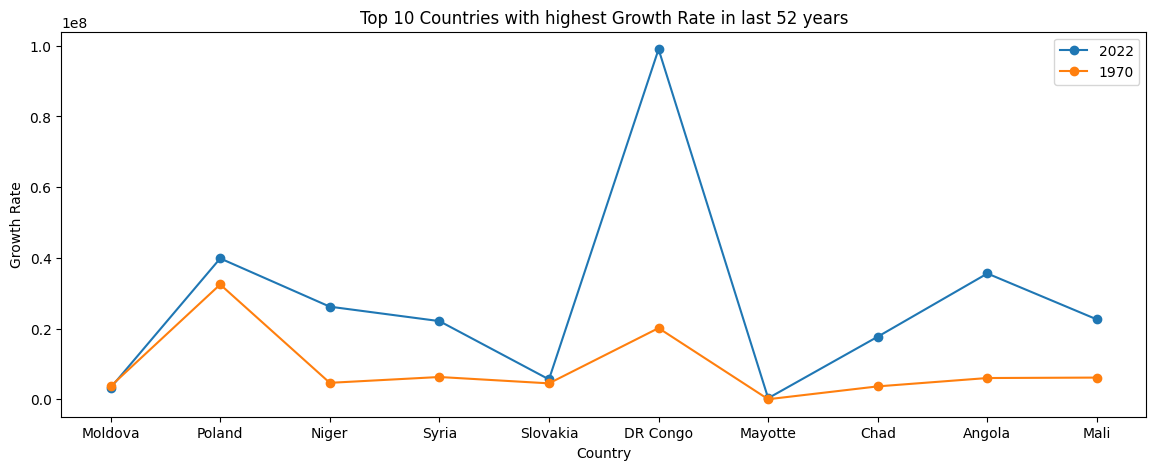

In [171]:
#plot
fig, ax = plt.subplots(figsize=(14,5))
plt.plot(top10_gr['Country'], top10_gr['2022'],label='2022', marker = 'o')
plt.plot(top10_gr['Country'], top10_gr['1970'],label='1970', marker = 'o')

plt.xlabel('Country')
plt.ylabel('Growth Rate')
plt.title('Top 10 Countries with highest Growth Rate in last 52 years')
plt.legend()
plt.show()


In [172]:
# Density per sq kme
fig = px.choropleth(df,
                      locations = 'Country',
                      locationmode='country names',
                      hover_name='Country',
                      color='Density (per km²)',
                      projection='natural earth',
                      color_continuous_scale='Jet',
                      title='Density (per km²)')
fig.show()

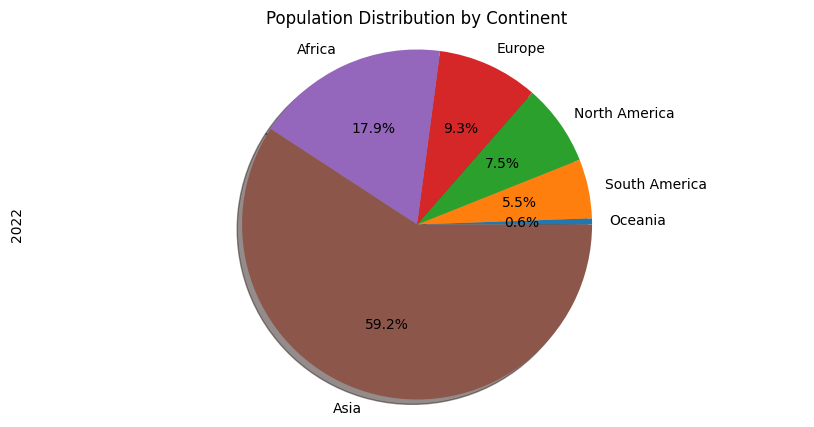

In [173]:
# Pie chart distribution

continent_df['2022'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%1.1f%%')
plt.title("Population Distribution by Continent")
plt.axis('equal')
plt.show()

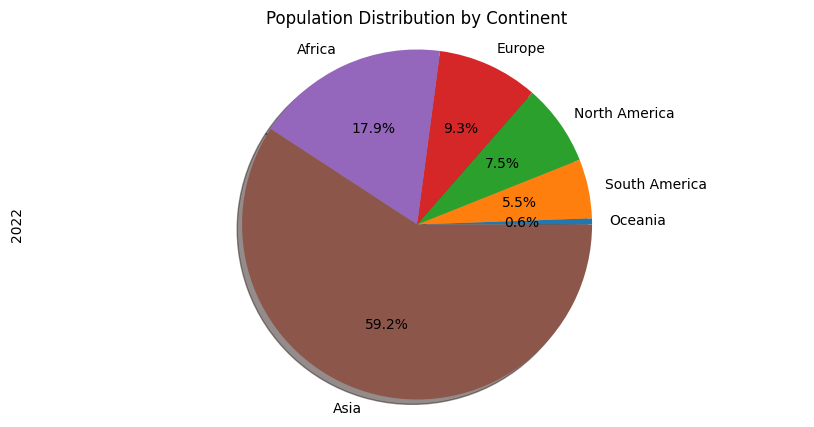

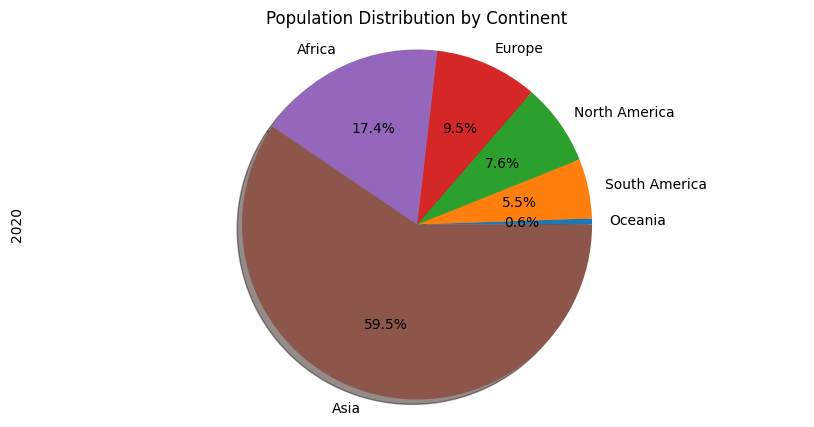

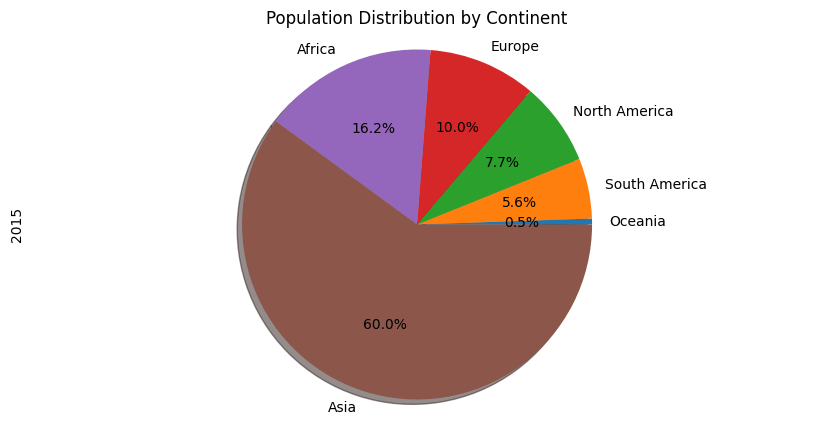

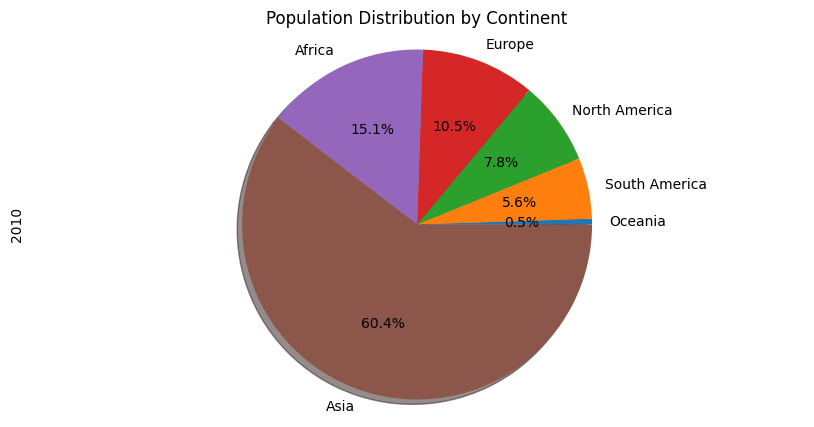

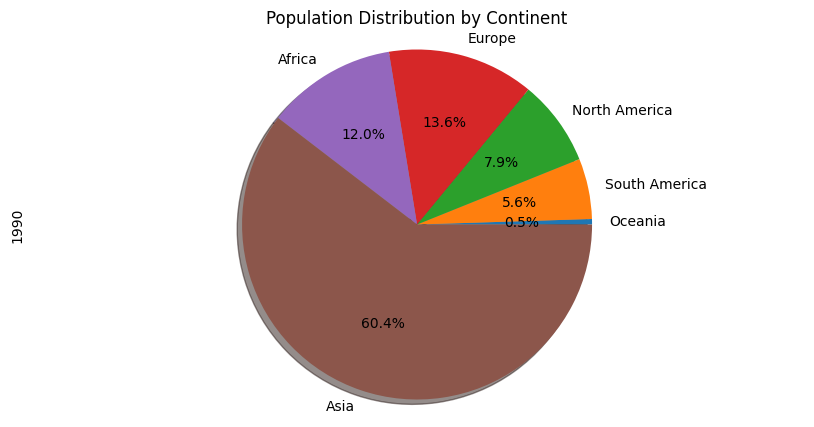

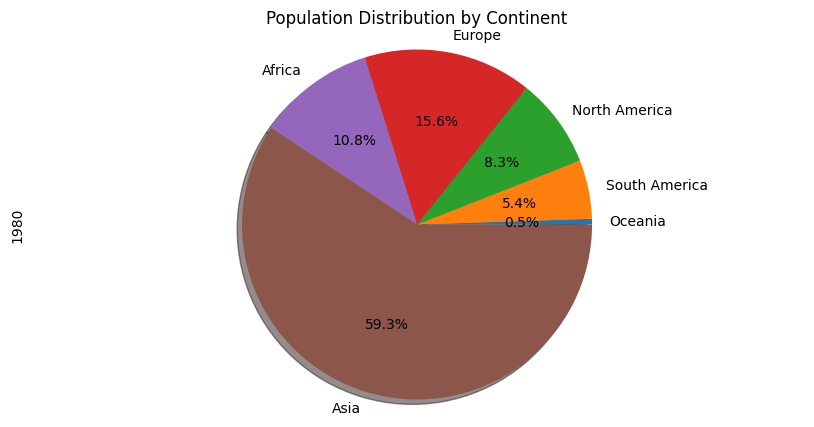

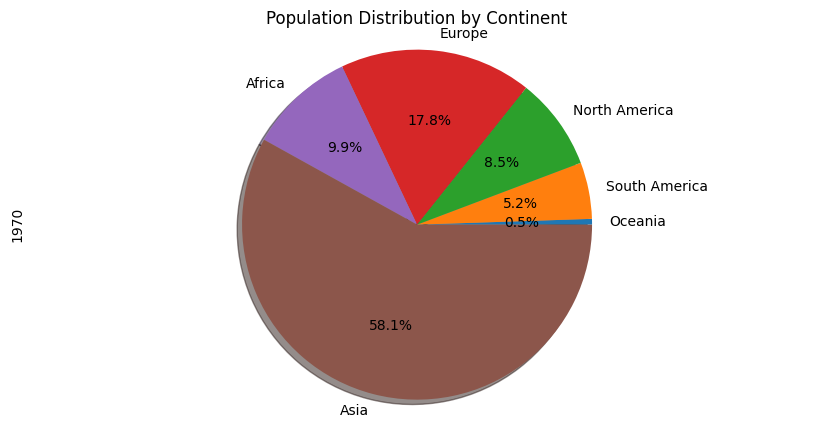

In [174]:
for year in years:
  continent_df[year].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%1.1f%%')
  plt.title("Population Distribution by Continent")
  plt.axis('equal')
  plt.show()

##### COuntries per continent


In [175]:

df_country = df['Continent'].value_counts()
df_country

,count
Continent,
Africa,57
Asia,50
Europe,50
North America,40
Oceania,23
South America,14


In [176]:
#plot
fig =px.bar(x = df_country.index,
       y= df_country.values,
       color = df_country.index,
       text = df_country.values,
       title="Number of Countries by Continent")

fig.update_layout(xaxis_title='Countries', yaxis_title="COunt")
fig.show()

### Analysis of Population Decade by Decade(1970-2020)

In [177]:
years = ['1970','1980','1990','2000','2010','2020']

continet_pop_bydecade=df.groupby('Continent')[years].sum().sort_values(by='Continent')
continet_pop_bydecade

,1970,1980,1990,2000,2010,2020
Continent,,,,,,
Africa,365444348,481536377,638150629,818946032,1055228072,1360671810
Asia,2144906290,2635334228,3210563577,3735089604,4220041327,4663086535
Europe,655923991,692527159,720320797,726093423,735613934,745792196
North America,315434606,368293361,421266425,486069584,542720651,594236593
Oceania,19480270,22920240,26743822,31222778,37102764,43933426
South America,192947156,241789006,297146415,349634282,393078250,431530043


In [178]:
for i in range(0,5):
  continet_pop_bydecade[years[i]+'-'+years[i+1]]=continet_pop_bydecade[years[i]]/continet_pop_bydecade[years[i+1]]*100

In [179]:
continet_pop_bydecade

,1970,1980,1990,2000,2010,2020,1970-1980,1980-1990,1990-2000,2000-2010,2010-2020
Continent,,,,,,,,,,,
Africa,365444348,481536377,638150629,818946032,1055228072,1360671810,75.891327,75.458106,77.923404,77.608439,77.551990
Asia,2144906290,2635334228,3210563577,3735089604,4220041327,4663086535,81.390295,82.083228,85.956802,88.508366,90.498885
Europe,655923991,692527159,720320797,726093423,735613934,745792196,94.714551,96.141492,99.204975,98.705773,98.635242
North America,315434606,368293361,421266425,486069584,542720651,594236593,85.647649,87.425282,86.667926,89.561653,91.330736
Oceania,19480270,22920240,26743822,31222778,37102764,43933426,84.991562,85.702934,85.654845,84.152162,84.452244
South America,192947156,241789006,297146415,349634282,393078250,431530043,79.799805,81.370326,84.987780,88.947756,91.089429


In [181]:
pop_diff_by_decade = continet_pop_bydecade.groupby('Continent')[['1970-1980',	'1980-1990',	'1990-2000',	'2000-2010',	'2010-2020']].sum().sort_values(by='Continent').reset_index()

In [182]:
pop_diff_by_decade.describe()

,1970-1980,1980-1990,1990-2000,2000-2010,2010-2020
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,83.739198,84.696895,86.732622,87.914025,88.926421
std,6.454366,6.966887,6.898899,6.941975,7.163646
min,75.891327,75.458106,77.923404,77.608439,77.551990
25%,80.197428,81.548551,85.154546,85.241213,85.963904
50%,83.190928,83.893081,85.805823,88.728061,90.794157
75%,85.483627,86.994695,86.490145,89.408178,91.270409
max,94.714551,96.141492,99.204975,98.705773,98.635242


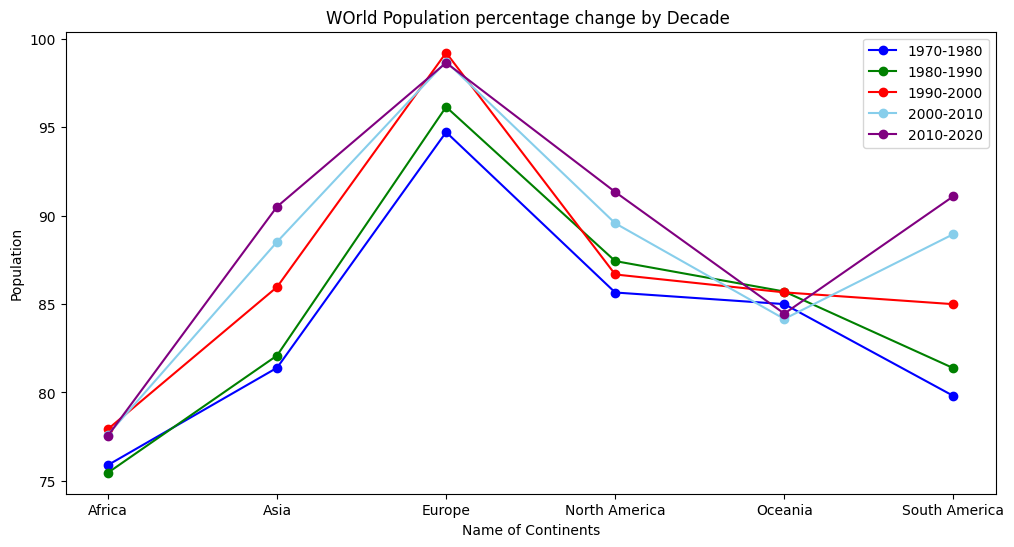

In [189]:
#plot the world population difference
fig,ax = plt.subplots(figsize=(12,6))
plt.plot(pop_diff_by_decade['Continent'], pop_diff_by_decade['1970-1980'], label='1970-1980',marker='o', color='blue')
plt.plot(pop_diff_by_decade['Continent'], pop_diff_by_decade['1980-1990'], label='1980-1990',marker='o', color='green')
plt.plot(pop_diff_by_decade['Continent'], pop_diff_by_decade['1990-2000'], label='1990-2000',marker='o', color='red')
plt.plot(pop_diff_by_decade['Continent'], pop_diff_by_decade['2000-2010'], label='2000-2010',marker='o', color='skyblue')
plt.plot(pop_diff_by_decade['Continent'], pop_diff_by_decade['2010-2020'], label='2010-2020',marker='o', color='purple')

plt.xlabel('Name of Continents')
plt.ylabel('Population')
plt.title("WOrld Population percentage change by Decade ")
plt.legend()
plt.show()